# Практическое задание

Иванычев Сергей Дмитриевич, группа 376 (база с 374-й)

### Задача Bike Sharing

Задача на kaggle: https://www.kaggle.com/c/bike-sharing-demand

По историческим данным о прокате велосипедов и погодных условиях необходимо спрогнозировтаь спрос на прокат велосипедов.

В исходной псотановке задачи доступно 9 признаков: https://www.kaggle.com/c/prudential-life-insurance-assessment/data

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные. 

### Анализ и визуализация данных

In [43]:
from sklearn import cross_validation, ensemble, grid_search, linear_model, metrics, pipeline, preprocessing

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
df = pd.read_csv("bike_sharing_train.csv")

In [47]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["year"] = df["datetime"].apply(lambda x: x.year)
df["hour"] = df["datetime"].apply(lambda x: x.hour)
cols = df.columns.tolist()
cols = cols[:9] + cols[10:] + cols[9:10]
df = df[cols]
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,2011,0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,2011,1,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,2011,2,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,2011,3,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,2011,4,1


In [109]:
df.head(25)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,2011,0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,2011,1,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,2011,2,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,2011,3,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,2011,4,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,2011,5,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2011,6,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,2011,7,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,2011,8,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,2011,9,14


3 . Проанализируйте описание данных:

***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***count*** - number of total rentals

До выполнения задания кажется, что наибольший вес у _season, holiday, working day_ и часа суток

Абсолютная дата, _atemp_

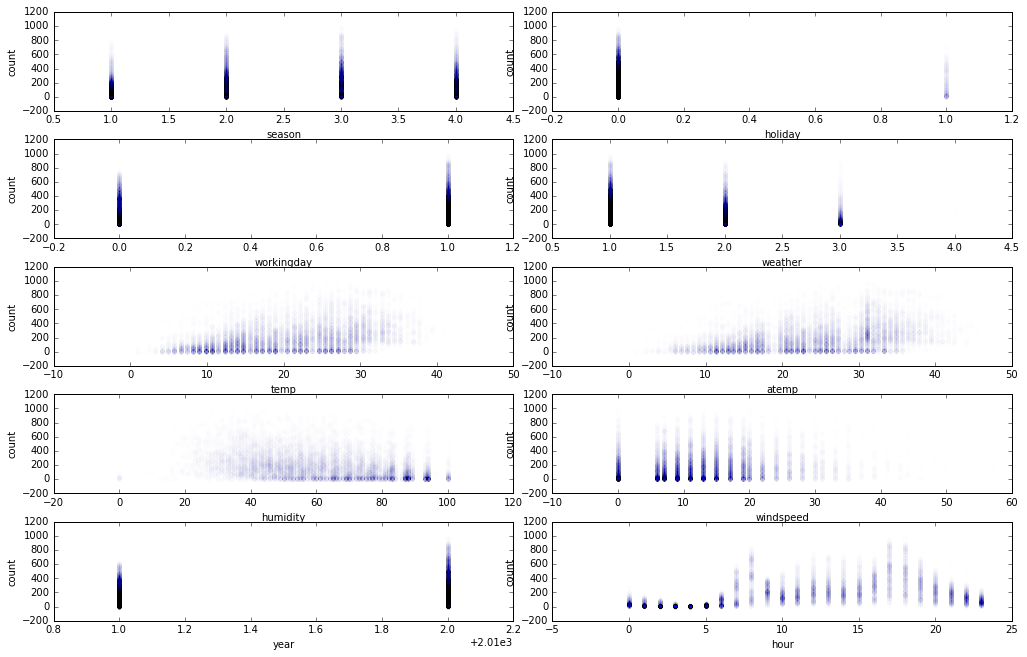

In [53]:
names = list(df.columns.values)[1:-1]
num_plots = len(names)
subplot_width = 2
fig, axes = plt.subplots(num_plots // subplot_width + num_plots % subplot_width, subplot_width, figsize=(14, 9))
fig.tight_layout()
for i, name in enumerate(names):
    plt.subplot(num_plots // subplot_width + num_plots % subplot_width, subplot_width, i + 1)
    plt.xlabel(name)
    plt.ylabel("count")
    plt.scatter(df[name], df["count"], alpha=0.005)

In [58]:
print(df["year"].value_counts())

2012    5464
2011    5422
Name: year, dtype: int64


Сложно что-то конкретное сказать по этим графикам. По графику count/year хочется сказать, что в 2012 году люди с большей охотой брали велосипеды. В рабочие дни велосипеды брали с большей охотой, чем в выходные.

In [68]:
corrs = []
for name in names:
    corr = df[[name, "count"]].corr().ix[0, 1]
    corrs.append((name, corr))
corrs

[('season', 0.16343901657637019),
 ('holiday', -0.0053929844777740425),
 ('workingday', 0.011593866091574248),
 ('weather', -0.12865520103850703),
 ('temp', 0.39445364496725355),
 ('atemp', 0.38978443662698026),
 ('humidity', -0.31737147887659395),
 ('windspeed', 0.10136947021033568),
 ('year', 0.26040329737829015),
 ('hour', 0.40060119414684681)]

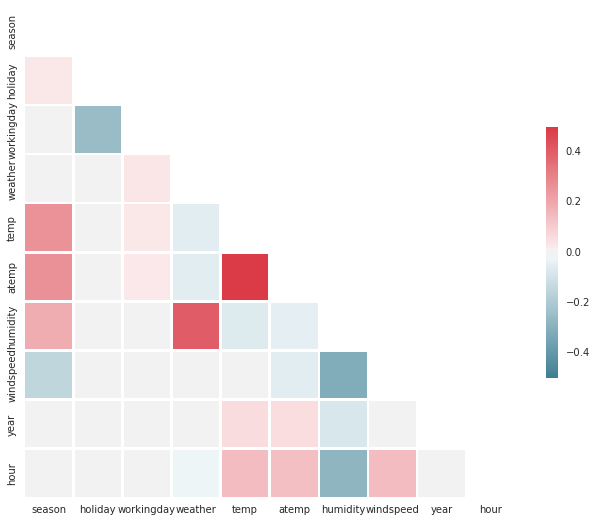

In [76]:
import seaborn as sns

sns.set(style="white")
corr = df[names].corr()

# making upper triangle zeros
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=1.5, cbar_kws={"shrink": .5}, ax=ax)

Да, есть

* `temp` и `atemp` ожидаемо коррелируют
* влажность и температуры коррелируют с временем года

In [82]:
print("Means: \n")
print(df[names].mean())
print("\nStandard deviation: \n")
print(df[names].std())


Means: 

season           2.506614
holiday          0.028569
workingday       0.680875
weather          1.418427
temp            20.230860
atemp           23.655084
humidity        61.886460
windspeed       12.799395
year          2011.501929
hour            11.541613
dtype: float64

Standard deviation: 

season         1.116174
holiday        0.166599
workingday     0.466159
weather        0.633839
temp           7.791590
atemp          8.474601
humidity      19.245033
windspeed      8.164537
year           0.500019
hour           6.915838
dtype: float64


Масштабы сильно отличаются. Это может привести к некорректным результатам некоторых алгоритмов машинного обучения (например SVM). Однако, например, решающие деревья нормально отрабатывают даже при раличных масштабах.

### Линейные модели

In [112]:
X = df[names].as_matrix()
y = df["count"].as_matrix()

In [113]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [114]:
def test_sgd_lasso(X, y):
    cv = cross_validation.KFold(y.shape[0], shuffle=True, n_folds=5)
    sgd_scores = []
    lasso_scores = []
    for train, test in cv:
        sgd = linear_model.SGDRegressor()
        lasso = linear_model.Lasso()
        sgd.fit(X[train], y[train])
        lasso.fit(X[train], y[train])
        sgd_pred = sgd.predict(X[test])
        lasso_pred = lasso.predict(X[test])
        sgd_scores.append(metrics.mean_absolute_error(y[test], sgd_pred))
        lasso_scores.append(metrics.mean_absolute_error(y[test], lasso_pred))
    sgd_scores = np.array(sgd_scores)
    lasso_scores = np.array(lasso_scores)
    return sgd_scores, lasso_scores

sgd_scores, lasso_scores = test_sgd_lasso(X, y)
print("SGD mean error: %f, std: %f" %(np.mean(sgd_scores), np.std(sgd_scores)))
print("Lasso mean error: %f, std: %f" % (np.mean(lasso_scores), np.std(lasso_scores)))

SGD mean error: 107.117775, std: 1.564290
Lasso mean error: 106.275380, std: 1.363111


In [115]:
sgd = linear_model.SGDRegressor()
lasso = linear_model.Lasso()
sgd.fit(X, y)
lasso.fit(X, y)
print("SGD weights: ")
for item in zip(names, sgd.coef_):
    print(item)
print("\nLasso weights: ")
for item in zip(names, lasso.coef_):
    print(item)

SGD weights: 
('season', 25.873927534985103)
('holiday', -1.0690262250796074)
('workingday', -3.1388580875789853)
('weather', -0.51846589549070876)
('temp', 19.794299838531185)
('atemp', 33.368056900082934)
('humidity', -40.540860572182126)
('windspeed', 4.3792481545625046)
('year', 42.330867715691184)
('hour', 56.545328806686832)

Lasso weights: 
('season', 23.293977047607992)
('holiday', -0.9120587538367525)
('workingday', 0.0)
('weather', -2.4556761327117389)
('temp', 14.398654277708166)
('atemp', 37.837366462119284)
('humidity', -38.114354230880764)
('windspeed', 3.908927878699743)
('year', 40.452721595729066)
('hour', 53.257360049068133)


По весам можно заключить, что наибольший вес составляют признаки: час, год, влажность и feels like температрура 

Удалим столбец "год", чтобы отвязаться от времени и на 100% честно использовать кросс-валидацию. Добавим признаки "идет ли дождь", "день недели" и "время суток"

In [128]:
# Кроме уже сгенерированных year и hour
def get_part_of_the_day(hour):
    assert hour <= 24
    
    if hour in range(4, 11):
        return 1
    if hour in range(11, 17):
        return 2
    if hour in range(17, 23):
        return 3
    return 4

df_copy = df.copy()
df_copy["is_raining"] = df_copy["weather"].apply(lambda x: 1 if x in [3, 4] else 0)
df_copy["day_part"] = df_copy["hour"].apply(lambda x: get_part_of_the_day(x))
df_copy["day_part_3hour"] = df_copy["hour"].apply(lambda x: x // 3)
df_copy["weekday"] = df_copy["datetime"].apply(lambda x: x.weekday())
df_copy.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,count,is_raining,day_part,day_part_3hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,2011,0,16,0,4,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,2011,1,40,0,4,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,2011,2,32,0,4,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,2011,3,13,0,4,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,2011,4,1,0,1,1,5


In [130]:
col_names = list(df_copy.columns.values)
col_names.remove("datetime")
col_names.remove("count")
col_names.remove("year")
names = col_names
X = df_copy[names].as_matrix()
y = df_copy["count"].as_matrix()
X = preprocessing.StandardScaler().fit_transform(X)

sgd_scores, lasso_scores = test_sgd_lasso(X, y)
print("SGD mean error: %f, std: %f" %(np.mean(sgd_scores), np.std(sgd_scores)))
print("Lasso mean error: %f, std: %f" % (np.mean(lasso_scores), np.std(lasso_scores)))

SGD mean error: 106.779310, std: 1.563965
Lasso mean error: 106.536190, std: 1.254966


Не смотря на то, что мы убрали значимый признак "год", мы стали получать немного лучший результат.

In [140]:
print(df.shape)
treshold = 8000
train_data = df[df.columns.values[1:-1]].iloc[:treshold, :]
train_labels = df[df.columns.values[-1]].iloc[:treshold]
test_data = df[df.columns.values[1:-1]].iloc[treshold:, :]
test_labels = df[df.columns.values[-1]].iloc[treshold:]

(10886, 12)


In [141]:
# Пример:
# train_data, train_labels - DataFrame с обучающей выборкой и значения целевой функции на обучении
# test_data, test_labels - DataFrame с тестовой выборкой и значения целевой функции на тесте



# Создание индекса для бинарных признаков
binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)

# Создание индекса для вещественных признаков
numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'season', 'weather', 'hour']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)

# Создание модели регресии
model = linear_model.SGDRegressor(random_state = 0)

# Объявление pipline -  цепочки преобразования данных, начиная от обработки данных в зависимости от их типа, и 
# заканчивая обучением модели. 

estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler())            
                        ])),

        ])),
    ('model_fitting', model)
    ]
)

# С цепочкой можно работать как с одиночным преобразованием, в частности вызывать методы fit и predict 
estimator.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, estimator.predict(test_data))

139.3038729112105

In [148]:
train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,4


In [159]:
def get_indexes(names, df):
    return np.array([(column in names) for column in df.columns], dtype = bool)

names = ["holiday", "workingday", "temp", "atemp", "humidity", "windspeed", "season", "weather"]

binary_idx  = get_indexes(["holiday", "workingday"], train_data)
number_idx  = get_indexes(["temp", "atemp", "humidity", "windspeed"], train_data)
nominal_idx = get_indexes(["season", "weather"], train_data)

def get_pipeline(model, binary_idx, number_idx, nominal_idx):
    binary_routine = ("binary_selection", preprocessing.FunctionTransformer(lambda data: data[:, binary_idx]))

    numeric_selection_routine = ("numeric_selection", preprocessing.FunctionTransformer(lambda data: data[:, number_idx]))
    numeric_scaling_routine = ("numeric_scaling", preprocessing.StandardScaler())
    numeric_routine = ("numeric_routine", pipeline.Pipeline(steps = [numeric_selection_routine, numeric_scaling_routine]))

    nominal_selection_routine = ("nominal_selection", preprocessing.FunctionTransformer(lambda data: data[:, nominal_idx]))
    nominal_encoding_routine = ("nominal_encoder", preprocessing.OneHotEncoder())
    nominal_routine = ("nominal_routine", pipeline.Pipeline(steps = [nominal_selection_routine, nominal_encoding_routine]))

    features_routine = ("features_routine", 
                        pipeline.FeatureUnion(transformer_list=[binary_routine, numeric_routine, nominal_routine]))
    fitting_routine = ("model_fitting", model)

    estimator = pipeline.Pipeline(steps = [features_routine, fitting_routine])
    return estimator

sgd_estimator = get_pipeline(linear_model.SGDRegressor(random_state = 0), binary_idx, number_idx, nominal_idx)
lasso_estimator = get_pipeline(linear_model.Lasso(random_state=0),  binary_idx, number_idx, nominal_idx)

In [166]:
print(train_data.shape)
print(test_data.shape)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(train_data[names])
X_test = scaler.transform(test_data[names])

plain_sgd = linear_model.SGDRegressor()
plain_sgd.fit(X_train, train_labels)
print(metrics.mean_absolute_error(test_labels, plain_sgd.predict(X_test)))

plain_lasso = linear_model.Lasso()
plain_lasso.fit(X_train, train_labels)
print(metrics.mean_absolute_error(test_labels, plain_lasso.predict(X_test)))

sgd_estimator.fit(train_data, train_labels)
print(metrics.mean_absolute_error(test_labels, sgd_estimator.predict(test_data)))

lasso_estimator.fit(train_data, train_labels)
print(metrics.mean_absolute_error(test_labels, lasso_estimator.predict(test_data)))

(8000, 10)
(2886, 10)
154.314701303
154.551335761
150.651300922
152.126293479


Вопреки моим ожиданиям, базовые регрессоры не особо хуже чем пайплайны с преобразованием номинальных признаков в данной метрике.

### Случайный лес

### Опциональная часть

Попробуйте улучшить результат, полученный на предыдущих шагах. В этом разделе можно и нужно пользоваться любыми изученными алгоритмами, инструментами и всем, чем вам захочется.

### Заключение

В этом разделе Вы можете написать, какие выводы Вы сделали в процессе работы над заданием, понравилось ли оно Вам, а также всё, что Вы о задании думаете =)